In [1]:
!wget http://cb.lk/covid_19

--2022-02-14 12:28:33--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-02-14 12:28:33--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-02-14 12:28:34--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-02

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

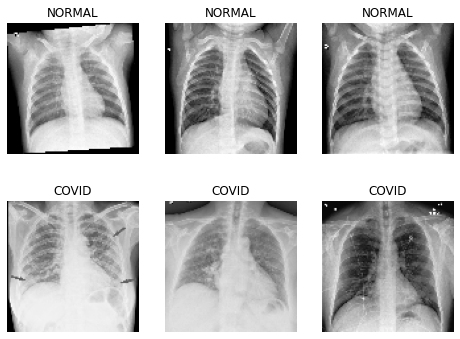

(112, 38)

In [3]:
import os
#provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

train_dir = 'CovidDataset/Train'
normal_imgs = [fn for fn in os.listdir(f'{train_dir}/Normal') if fn.endswith('.jpeg')]
covid_imgs = [fn for fn in os.listdir(f'{train_dir}/Covid') if fn.endswith('.jpeg')]

select_norm = np.random.choice(normal_imgs, 3, replace = False)
select_cov = np.random.choice(covid_imgs, 3, replace = False)

fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/Normal/{select_norm[i]}'
        label = 'NORMAL'
    else:
        fp = f'{train_dir}/Covid/{select_cov[i-3]}'
        label = 'COVID'
    ax = fig.add_subplot(2, 3, i+1)
    
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

len(normal_imgs), len(covid_imgs)

In [4]:
def imgtonp(path, list_of_filename, size = (64, 64)):
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        img_ts = image.img_to_array(current_image)
        img_ts = [img_ts.ravel()] #2D array to 1D array
        try:
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            full_mat = img_ts
    return full_mat

normal_images = imgtonp(f'{train_dir}/Normal/', normal_imgs)
covid_images = imgtonp(f'{train_dir}/Covid/', covid_imgs)

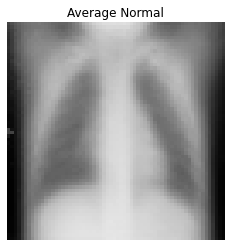

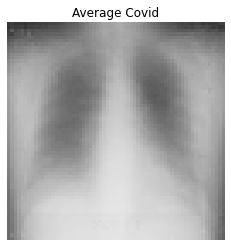

In [5]:
def find_mean_img(full_mat, title, size = (64, 64)):
    mean_img = np.mean(full_mat, axis = 0)
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_images, 'Normal')
cov_mean = find_mean_img(covid_images, 'Covid')

#As we can see Covid Images show greater obstruction in the chest area

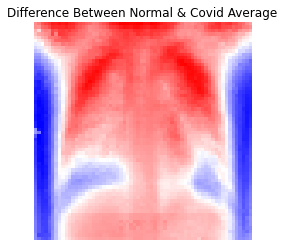

In [6]:
contrast_mean = norm_mean - cov_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title('Difference Between Normal & Covid Average')
plt.axis('off')
plt.show()

Number of PC:  19


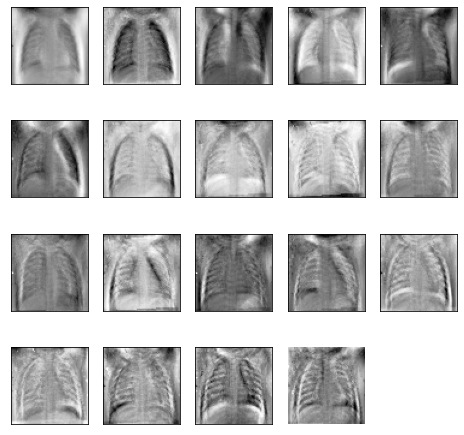

Number of PC:  6


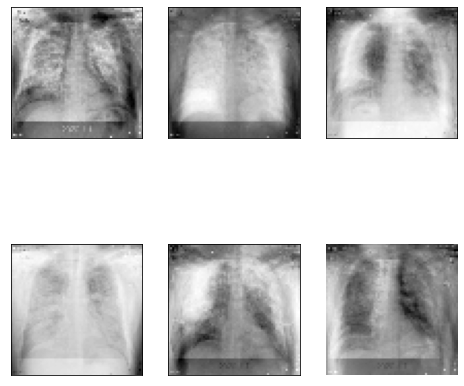

In [7]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    
plot_pca(eigenimages(normal_images, 'Normal'))
plot_pca(eigenimages(covid_images, 'Covid'))

#More edge definitions around the ribcage in Normal compared to Covid

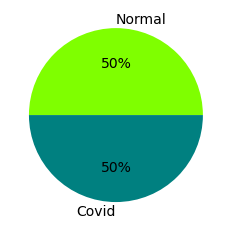

In [8]:
x = np.array([len(os.listdir(f'{train_dir}/Normal')),len(os.listdir(f'{train_dir}/Covid'))])
labels = ['Normal', 'Covid']
colors = {'Normal': 'chartreuse','Covid': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.0, colors = [colors[key] for key in labels], textprops={'fontsize': 14})
plt.show()